In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('classification_project.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,<=50K
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18.0,United-States,<=50K
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K


In [ ]:
df = df.replace('?', np.NaN)

In [ ]:
df.shape

(33272, 15)

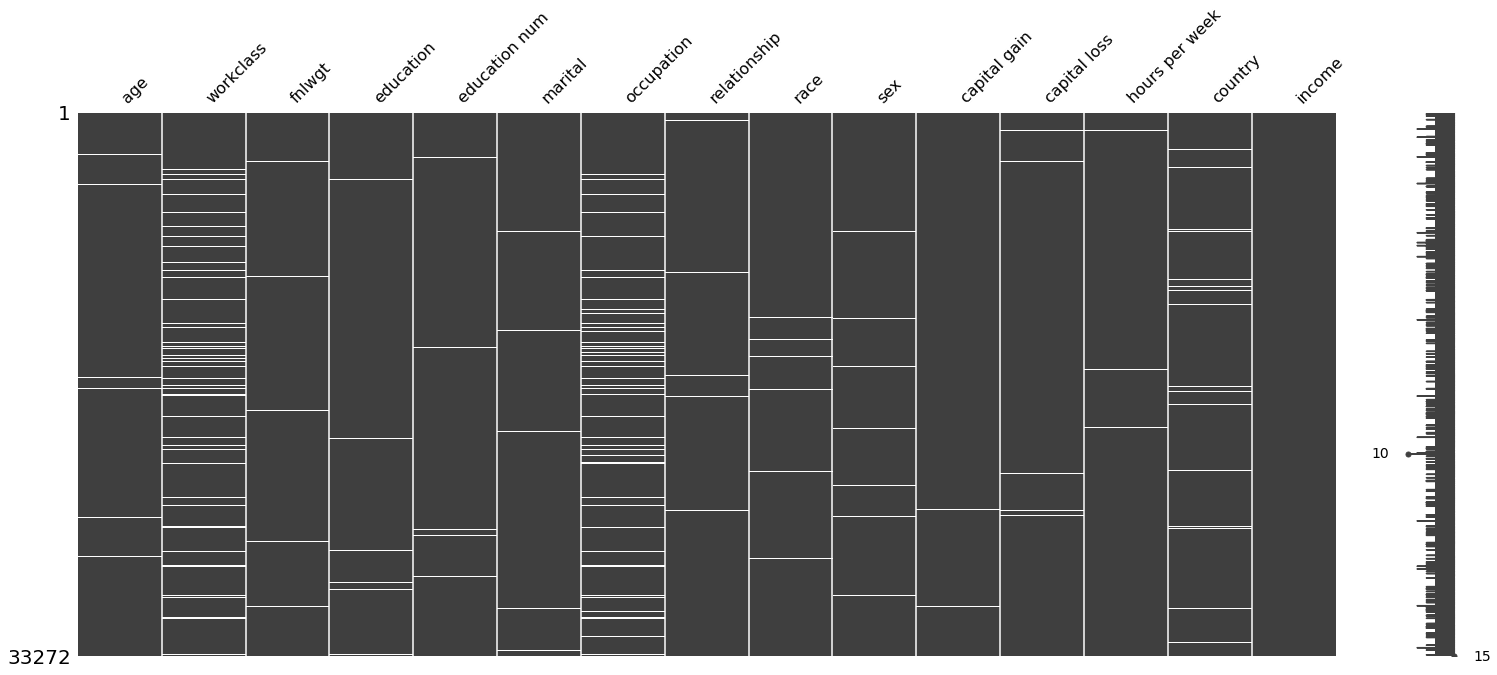

In [ ]:
%matplotlib inline
msno.matrix(df.sample(len(df)))

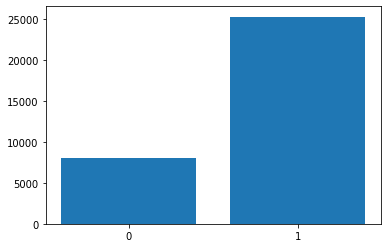

In [ ]:
plt.bar(['0', '1'], df['income'].value_counts(ascending=True))
plt.show()

In [ ]:
df['income'].value_counts()

<=50K    25276
>50K      7996
Name: income, dtype: int64

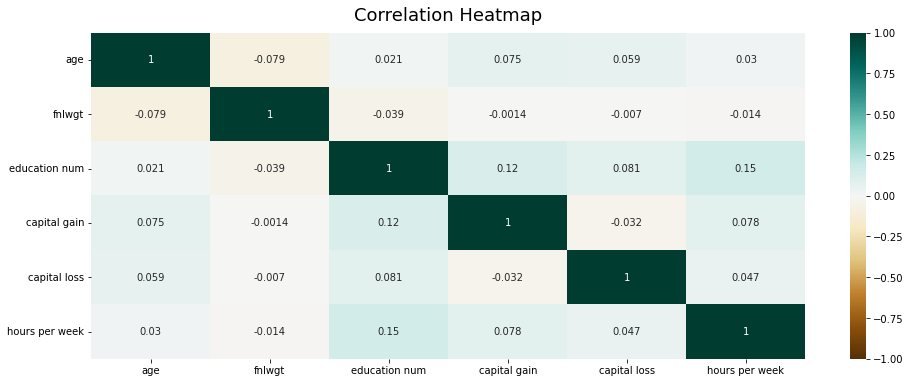

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')

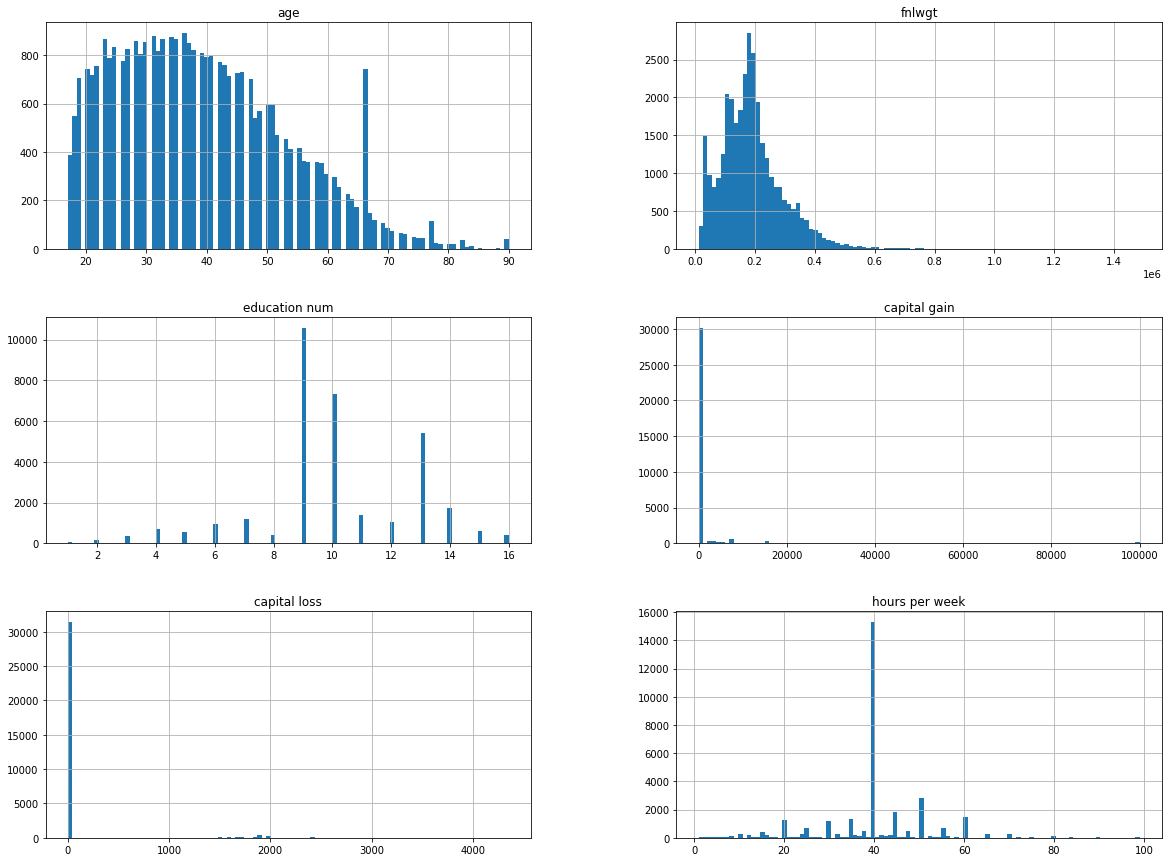

In [ ]:
df.hist(bins=100, figsize=(20, 15))
plt.show()

In [ ]:
np.mean(df['capital loss'])

88.19077389984825

In [ ]:
np.mean(df['capital gain'])

1088.3620406923778

In [ ]:
X = df.drop(['income'], axis = 1)
y = df[['income']].values.ravel()

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=1, stratify=df[['income']])100, 'min_samples_split':

In [ ]:
len(test_set)

6655

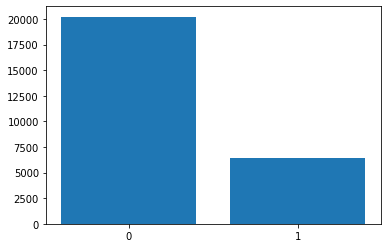

In [ ]:
plt.bar(['0', '1'], train_set['income'].value_counts())
plt.show()

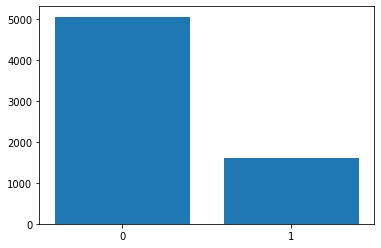

In [ ]:
plt.bar(['0', '1'], test_set['income'].value_counts())
plt.show()

In [ ]:
train_set.loc[df['income'] == '<=50K', 'income'] = 0
train_set.loc[df['income'] == '>50K', 'income'] = 1

In [ ]:
test_set.loc[df['income'] == '<=50K', 'income'] = 0
test_set.loc[df['income'] == '>50K', 'income'] = 1

In [ ]:
print(len(train_set[train_set['income'] == 1]) / len(train_set[train_set['income'] == 0]))
print(len(test_set[test_set['income'] == 1]) / len(test_set[test_set['income'] == 0]))

0.3163699307616222
0.31625791139240506


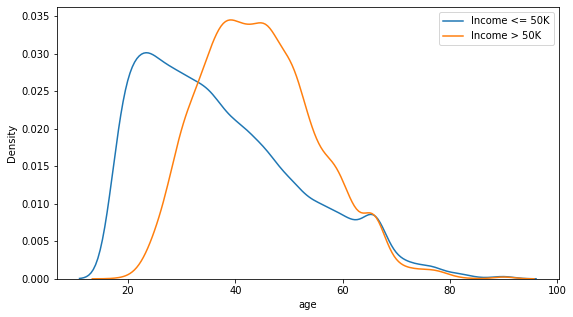

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train_set['age'][train_set['income']==0], ax=ax)
sns.kdeplot(train_set['age'][train_set['income']==1], ax=ax)
plt.legend(['Income <= 50K', 'Income > 50K'])
plt.xlabel('age')
plt.ylabel('Density')
plt.show()

In [ ]:
l=[]
for i in range(17, 91):
  l.append(i)
k=[]
for i in range(17, 91):
  if len(train_set[train_set['age'] == i]) == 0:
    k.append(train_set[train_set['age'] == i-1]['income'].sum()/len(train_set[train_set['age'] == i-1]))
  else:
    k.append(train_set[train_set['age'] == i]['income'].sum()/len(train_set[train_set['age'] == i]))

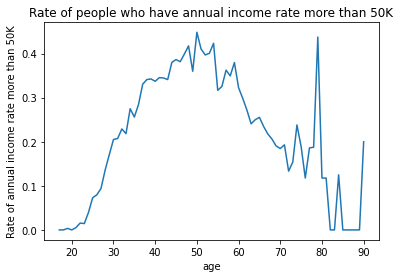

In [ ]:
plt.plot(l, k)
plt.title('Rate of people who have annual income rate more than 50K')
plt.xlabel('age')
plt.ylabel('Rate of annual income rate more than 50K')
plt.show()

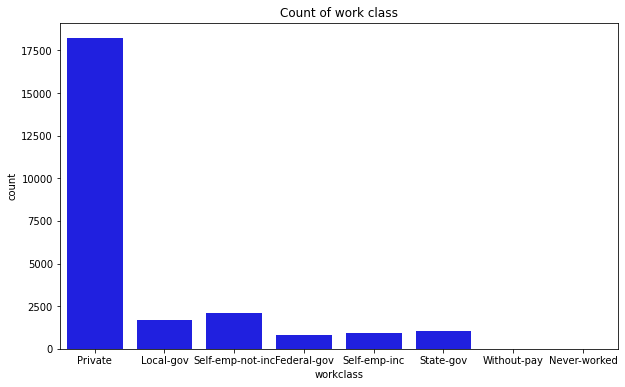

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Count of work class')
sns.countplot(x = train_set['workclass'],
              data = train_set, color='blue')

plt.show()

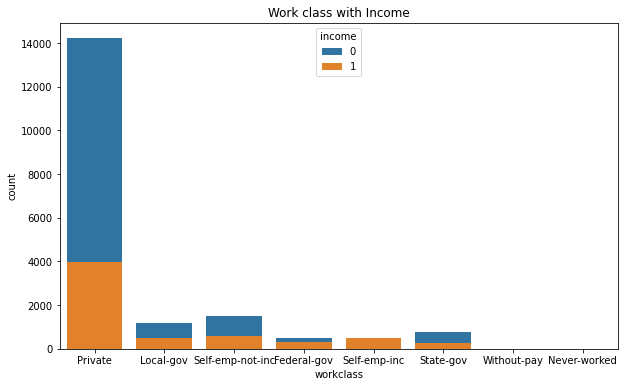

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Work class with Income')
sns.countplot(x = train_set['workclass'],
              data = train_set,
              hue = train_set['income'],
              dodge = False  )

plt.show()

In [ ]:
ll=[]
ll.append(len(train_set[(train_set['workclass'] == 'Private') & (train_set['income'] == 1)])/len(train_set[train_set['workclass']=='Private']))
ll.append(len(train_set[(train_set['workclass'] == 'State-gov') & (train_set['income'] == 1)])/len(train_set[train_set['workclass']=='State-gov']))
ll.append(len(train_set[(train_set['workclass'] == 'Federal-gov') & (train_set['income'] == 1)])/len(train_set[train_set['workclass']=='Federal-gov']))
ll.append(len(train_set[(train_set['workclass'] == 'Self-emp-not-inc') & (train_set['income'] == 1)])/len(train_set[train_set['workclass']=='Self-emp-not-inc']))
ll.append(len(train_set[(train_set['workclass'] == 'Self-emp-inc') & (train_set['income'] == 1)])/len(train_set[train_set['workclass']=='Self-emp-inc']))
ll.append(len(train_set[(train_set['workclass'] == 'Local-gov') & (train_set['income'] == 1)])/len(train_set[train_set['workclass']=='Local-gov']))
ll.append(len(train_set[(train_set['workclass'] == 'Without-pay') & (train_set['income'] == 1)])/len(train_set[train_set['workclass']=='Without-pay']))
ll.append(len(train_set[(train_set['workclass'] == 'Never-worked') & (train_set['income'] == 1)])/len(train_set[train_set['workclass']=='Never-worked']))

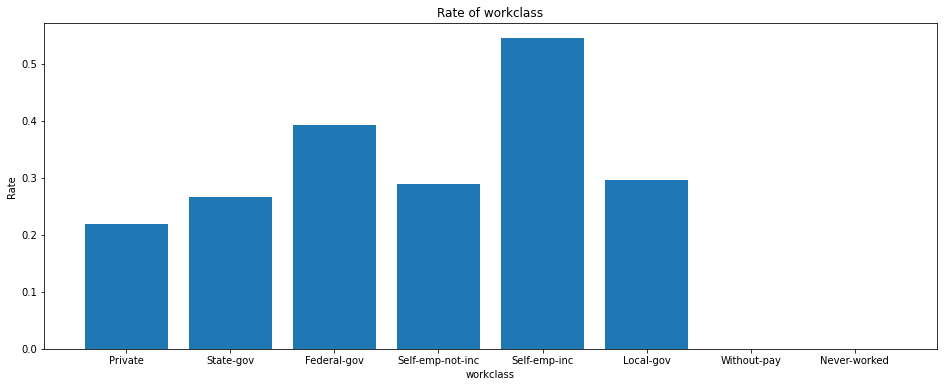

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Rate of workclass')
plt.xlabel('workclass')
plt.ylabel('Rate')
plt.bar(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'], ll)
plt.show()

In [ ]:
print(len(train_set[train_set['workclass'] == 'Without-pay']))
print(len(train_set[train_set['workclass'] == 'Never-worked']))

8
5


In [ ]:
print(len(train_set[(train_set['workclass'] == 'Without-pay') & (train_set['income'] == 1)]))
print(len(train_set[(train_set['workclass'] == 'Never-worked') & (train_set['income'] == 1)]))

0
0


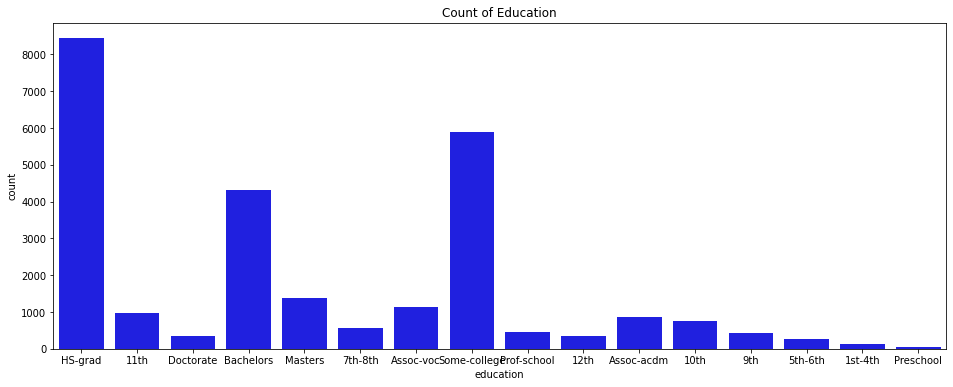

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Count of Education')
sns.countplot(x = train_set['education'],
              data = train_set, color='blue',
              dodge = False  )

plt.show()

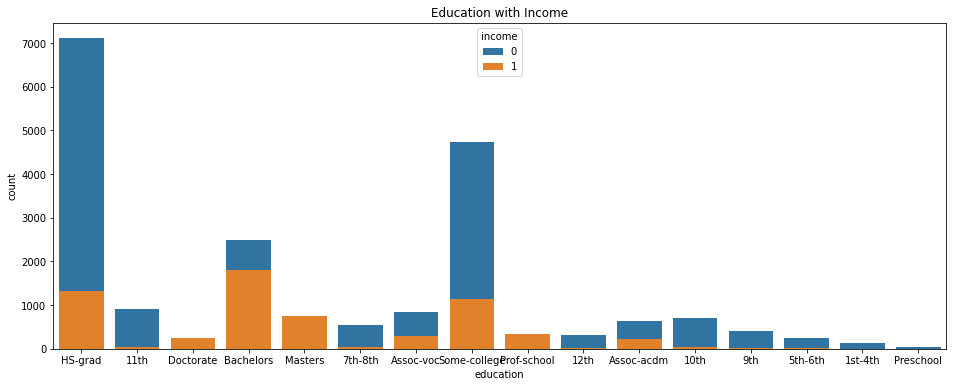

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Education with Income')
sns.countplot(x = train_set['education'],
              data = train_set,
              hue = train_set['income'],
              dodge = False  )

plt.show()

In [ ]:
train_set['education num'].unique()

array([ 9.,  7., 16., 13., 14.,  4., 11., 10., 15.,  8., 12.,  6.,  5.,
       nan,  3.,  2.,  1.])

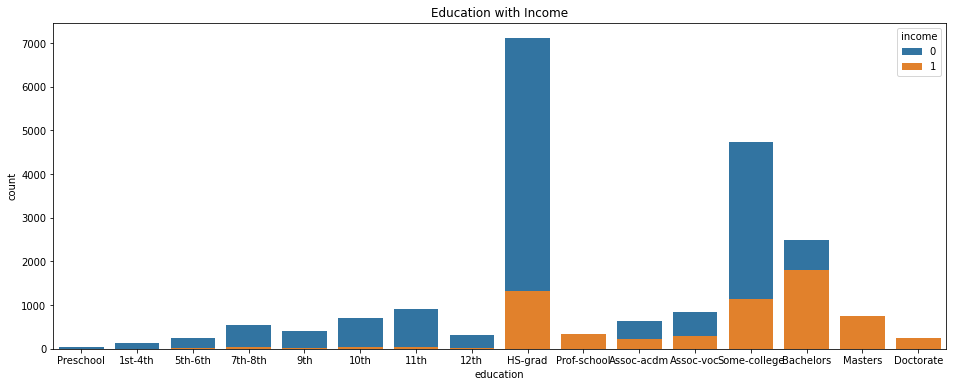

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Education with Income')
sns.countplot(x = train_set['education'],
              data = train_set,
              hue = train_set['income'],
              dodge = False, order=['Preschool', '1st-4th', '5th-6th', '7th-8th' , '9th' , '10th' , '11th' ,'12th' ,'HS-grad' , 'Prof-school' , 'Assoc-acdm' , 'Assoc-voc' , 'Some-college', 'Bachelors' , 'Masters' , 'Doctorate'])

plt.show()

In [ ]:
kk=[]
for i in range(1, 17):
    kk.append(train_set[train_set['education num'] == i]['income'].sum()/len(train_set[train_set['education num'] == i]))

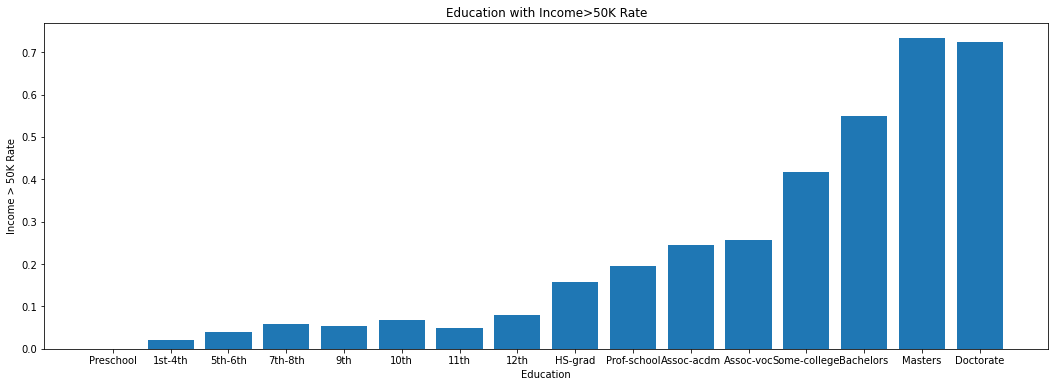

In [ ]:
plt.figure(figsize=(18, 6))
plt.title('Education with Income>50K Rate')
plt.xlabel('Education')
plt.ylabel('Income > 50K Rate')
plt.bar(['Preschool', '1st-4th', '5th-6th', '7th-8th' , '9th' , '10th' , '11th' ,'12th' ,'HS-grad' , 'Prof-school' , 'Assoc-acdm' , 'Assoc-voc' , 'Some-college', 'Bachelors' , 'Masters' , 'Doctorate'], kk)

plt.show()

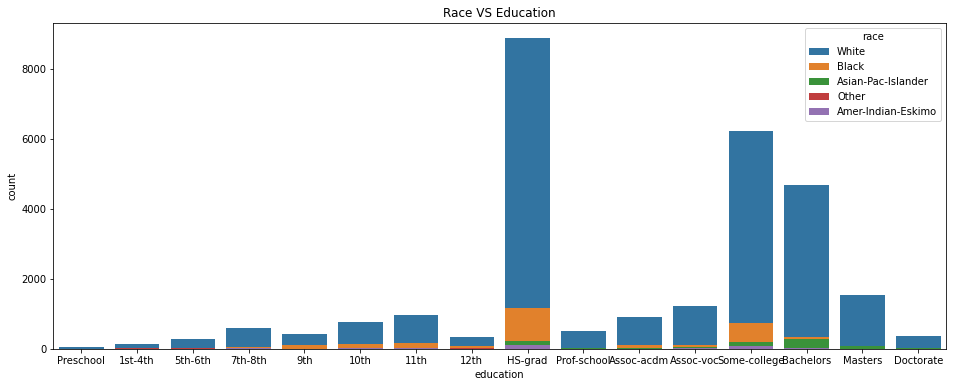

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Race VS Education')
plt.xlabel('Education')
plt.ylabel('Count')
sns.countplot(x = df['education'],
              data = df,
              hue = df['race'],
              dodge = False, order=['Preschool', '1st-4th', '5th-6th', '7th-8th' , '9th' , '10th' , '11th' ,'12th' ,'HS-grad' , 'Prof-school' , 'Assoc-acdm' , 'Assoc-voc' , 'Some-college', 'Bachelors' , 'Masters' , 'Doctorate'])

plt.show()

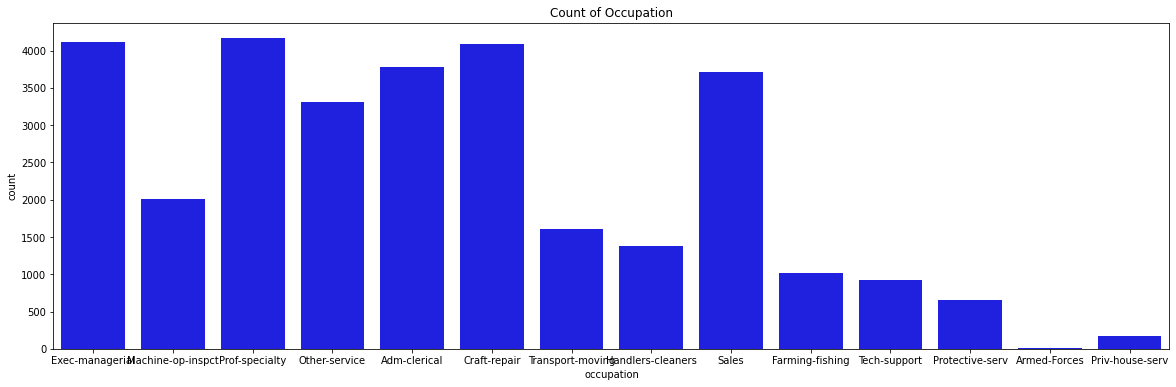

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('Count of Occupation')
sns.countplot(x = df['occupation'],
              data = df, color='blue',
              dodge = False  )

plt.show()

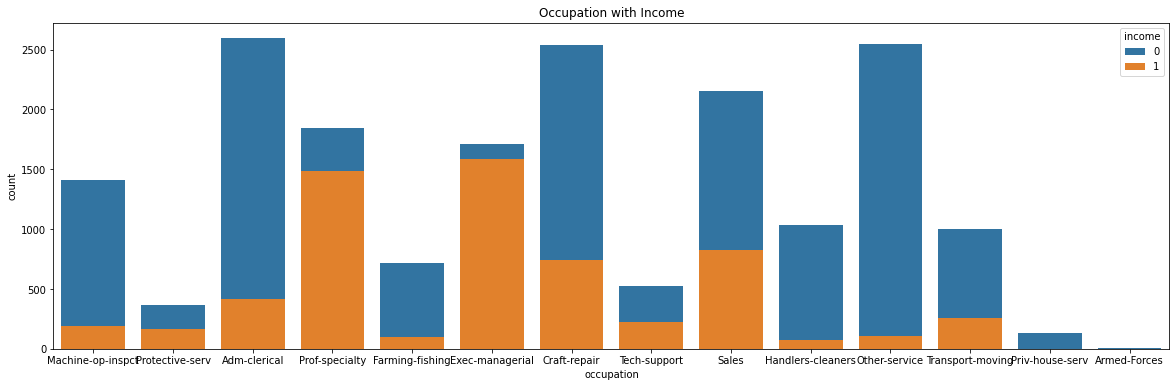

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('Occupation with Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
sns.countplot(x = train_set['occupation'],
              data = train_set,
              hue = train_set['income'],
              dodge = False, )

plt.show()

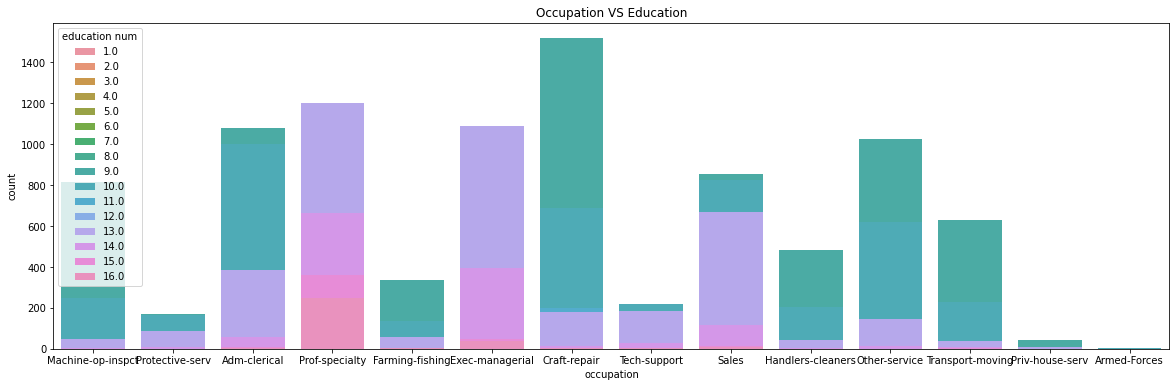

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('Occupation VS Education')
plt.xlabel('Occupation')
plt.ylabel('Count')
sns.countplot(x = train_set['occupation'],
              data = train_set,
              hue = train_set['education num'],
              dodge = False, )

plt.show()

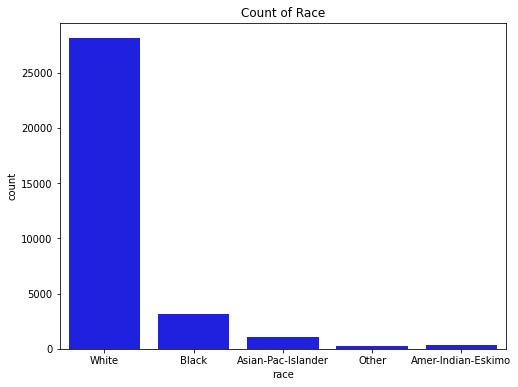

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Count of Race')
sns.countplot(x = df['race'],
              data = df, color='blue',
              dodge = False  )

plt.show()

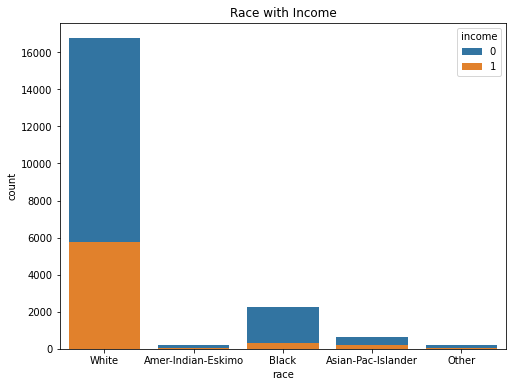

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Race with Income')
plt.xlabel('Race')
plt.ylabel('Count')
sns.countplot(x = train_set['race'],
              data = train_set,
              hue = train_set['income'],
              dodge = False, )

plt.show()

In [ ]:
lll=[]
lll.append(len(train_set[(train_set['race'] == 'White') & (train_set['income'] == 1)])/len(train_set[train_set['race']=='White']))
lll.append(len(train_set[(train_set['race'] == 'Black') & (train_set['income'] == 1)])/len(train_set[train_set['race']=='Black']))
lll.append(len(train_set[(train_set['race'] == 'Asian-Pac-Islander') & (train_set['income'] == 1)])/len(train_set[train_set['race']=='Asian-Pac-Islander']))
lll.append(len(train_set[(train_set['race'] == 'Other') & (train_set['income'] == 1)])/len(train_set[train_set['race']=='Other']))
lll.append(len(train_set[(train_set['race'] == 'Amer-Indian_Eskimo') & (train_set['income'] == 1)])/len(train_set[train_set['race']=='Amer-Indian-Eskimo']))

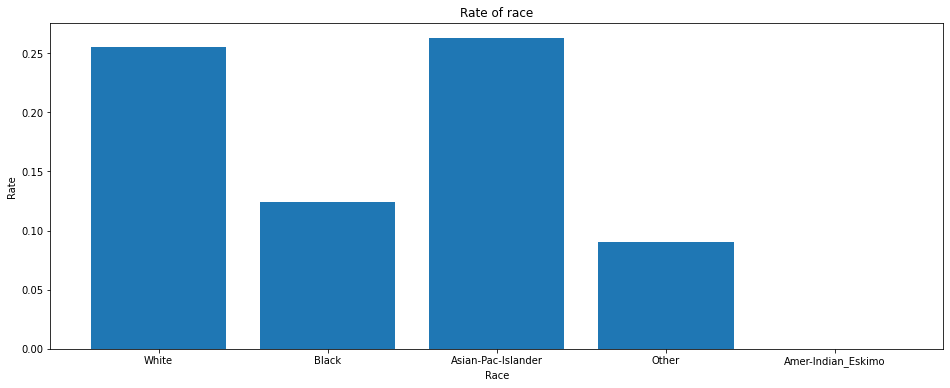

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Rate of race')
plt.xlabel('Race')
plt.ylabel('Rate')
plt.bar(['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian_Eskimo'], lll)
plt.show()

In [ ]:
df['oc']=df['occupation']

In [ ]:
for i in df[(df['oc'] == 'Prof-specialty')].index:
        df.at[i, 'oc'] = 'top income occupation'

In [ ]:
for i in df[(df['oc']=='Exec-managerial')].index:
        df.at[i, 'oc'] = 'top income occupation'

In [ ]:
df['oc'].unique()

array([nan, 'top income occupation', 'Machine-op-inspct', 'Other-service',
       'Adm-clerical', 'Craft-repair', 'Transport-moving',
       'Handlers-cleaners', 'Sales', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Armed-Forces', 'Priv-house-serv'], dtype=object)

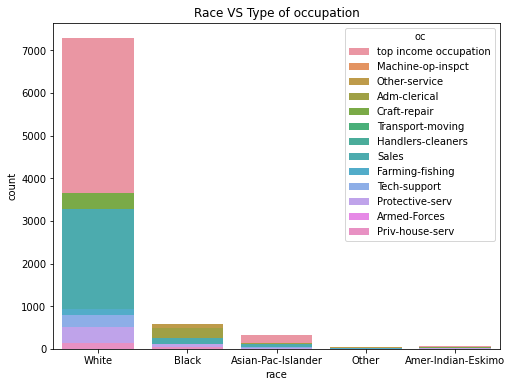

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Race VS Type of occupation')
plt.xlabel('Race')
plt.ylabel('Count')
sns.countplot(x = df['race'],
              data = df,
              hue = df['oc'],
              dodge = False, )

plt.show()

In [ ]:
rr=[]
df_and = df[(df['race'] == 'White') & (df['oc'] == 'top income occupation')]
rr.append(len(df_and)/len(df[df['race']=='White']))
df_and2 = df[(df['race'] == 'Black') & (df['oc'] == 'top income occupation')]
rr.append(len(df_and2)/len(df[df['race']=='Black']))
df_and3 = df[(df['race'] == 'Asian-Pac-Islander') & (df['oc'] == 'top income occupation')]
rr.append(len(df_and3)/len(df[df['race']=='Asian-Pac-Islander']))
df_and4 = df[(df['race'] == 'Other') & (df['oc'] == 'top income occupation')]
rr.append(len(df_and4)/len(df[df['race']=='Other']))
df_and5 = df[(df['race'] == 'Amer-Indian-Eskimo') & (df['oc'] == 'top income occupation')]
rr.append(len(df_and5)/len(df[df['race']=='Amer-Indian-Eskimo']))

In [ ]:
rr

[0.25897745857925053,
 0.15411173885750157,
 0.30038387715930903,
 0.148014440433213,
 0.20257234726688103]

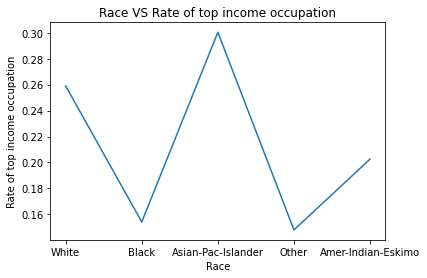

In [ ]:
plt.title('Race VS Rate of top income occupation')
plt.xlabel('Race')
plt.ylabel('Rate of top income occupation')
plt.plot(['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'], rr)

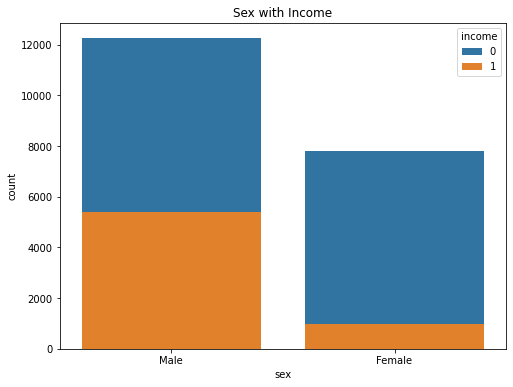

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Sex with Income')
plt.xlabel('Sex')
plt.ylabel('Count')
sns.countplot(x = train_set['sex'],
              data = train_set,
              hue = train_set['income'],
              dodge = False, )

plt.show()

In [ ]:
a=['United-States',
		 'Mexico',
		 'Philippines',
		 'Germany',
		 'Puerto-Rico',
		 'Cuba',
		 'Canada',
		 'El-Salvador',
		 'India',
		 'England',
		 'Jamaica',
		 'Guatemala',
		 'South',
		 'China',
		 'Dominican-Republic',
		 'Italy',
		 'Japan',
		 'Vietnam',
		 'Poland',
		 'Columbia',
		 'Haiti',
		 'Taiwan',
		 'Iran',
		 'Peru',
		 'Nicaragua',
		 'Portugal',
		 'Ecuador',
		 'Greece',
		 'France',
		 'Ireland',
		 'Yugoslavia',
		 'Hong',
		 'Thailand',
		 'Hungary',
		 'Trinadad&Tobago',
		 'Laos',
		 'Cambodia',
		 'Honduras',
		 'Outlying-US(Guam-USVI-etc)',
		 'Scotland',
		 'Holand-Netherlands']

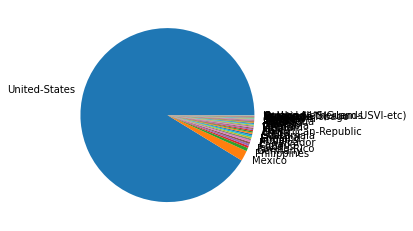

In [ ]:
plt.pie(train_set['country'].value_counts(), labels=a)
plt.show()

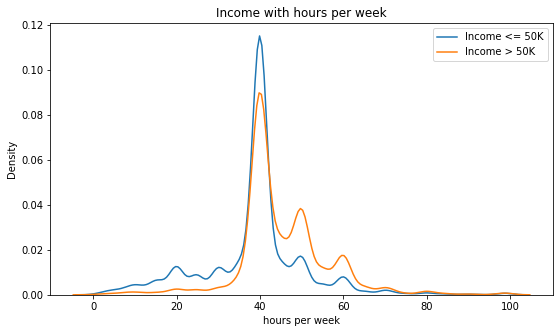

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train_set['hours per week'][train_set['income']==0], ax=ax)
sns.kdeplot(train_set['hours per week'][train_set['income']==1], ax=ax)
plt.legend(['Income <= 50K', 'Income > 50K'])
plt.title('Income with hours per week')
plt.xlabel('hours per week')
plt.ylabel('Density')
plt.show()

In [ ]:
w=[]
for i in range(1, 100):
  w.append(i)
e=[]
for i in range(1, 100):
  if len(train_set[train_set['hours per week'] == i]) == 0:
    e.append(train_set[train_set['hours per week'] == i-1]['income'].sum()/len(train_set[train_set['hours per week'] == i-1]))
  else:
    e.append(train_set[train_set['hours per week'] == i]['income'].sum()/len(train_set[train_set['hours per week'] == i]))

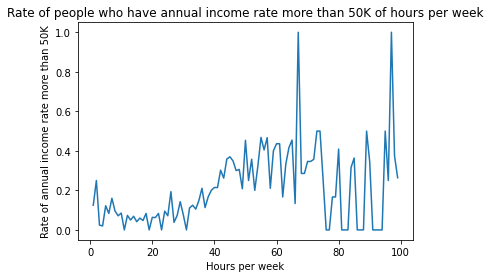

In [ ]:
plt.plot(w, e)
plt.title('Rate of people who have annual income rate more than 50K of hours per week')
plt.xlabel('Hours per week')
plt.ylabel('Rate of annual income rate more than 50K')
plt.show()

In [ ]:
train_set

,age,workclass,fnlwgt,education,education num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
29604,38.0,Private,207202.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,NaN,48.0,United-States,1
21430,34.0,Local-gov,22641.0,HS-grad,9.0,Never-married,Protective-serv,Not-in-family,Amer-Indian-Eskimo,Male,0.0,0.0,40.0,United-States,0
25961,17.0,Private,160968.0,11th,7.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,16.0,United-States,0
768,51.0,Local-gov,146325.0,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,1887.0,40.0,United-States,1
22922,49.0,Self-emp-not-inc,182211.0,HS-grad,9.0,Widowed,Farming-fishing,Not-in-family,White,Male,0.0,0.0,55.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23273,27.0,Private,258768.0,Bachelors,13.0,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0.0,0.0,40.0,United-States,0
4197,18.0,Private,32244.0,11th,7.0,Never-married,Handlers-cleaners,Own-child,White,Male,594.0,0.0,30.0,United-States,0
19437,50.0,Local-gov,139296.0,11th,7.0,Never-married,Craft-repair,Unmarried,White,Male,0.0,0.0,40.0,United-States,0
28684,22.0,Private,324922.0,HS-grad,9.0,Never-married,Machine-op-inspct,Not-in-family,White,Male,0.0,0.0,50.0,United-States,0


In [ ]:
train_set = train_set.drop(['fnlwgt', 'marital', 'relationship', 'capital gain', 'capital loss','education', 'workclass'], axis=1)

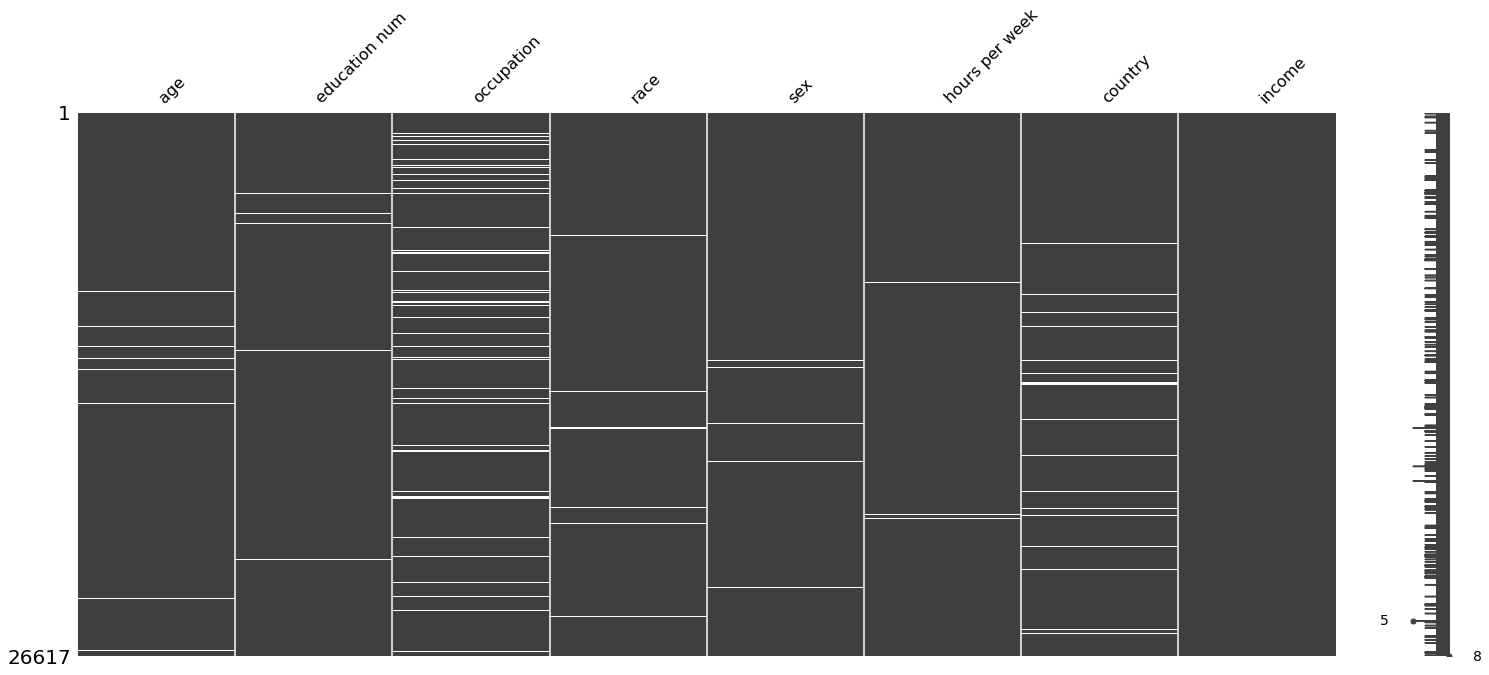

In [ ]:
%matplotlib inline
msno.matrix(train_set.sample(len(train_set)))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


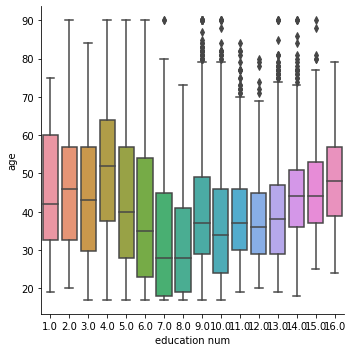

In [ ]:
g = sns.factorplot(y="age",x="education num", data=train_set,kind="box")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


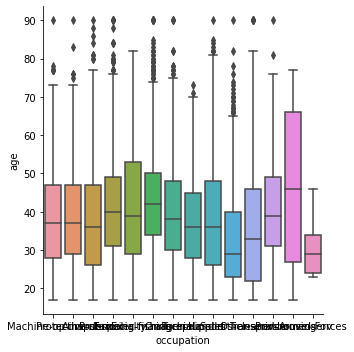

In [ ]:
g = sns.factorplot(y="age",x="occupation", data=train_set,kind="box")

In [ ]:
train_set[train_set['education num']==1]['age'].mean()

45.395348837209305

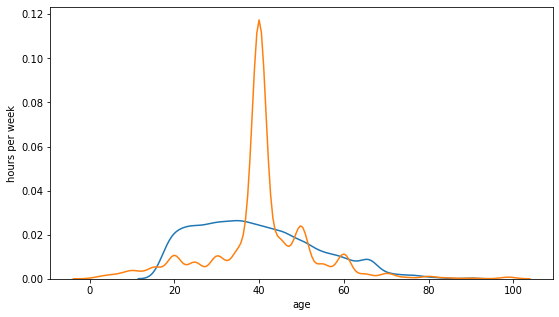

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train_set['age'], ax=ax)
sns.kdeplot(train_set['hours per week'], ax=ax)
plt.xlabel('age')
plt.ylabel('hours per week')
plt.show()

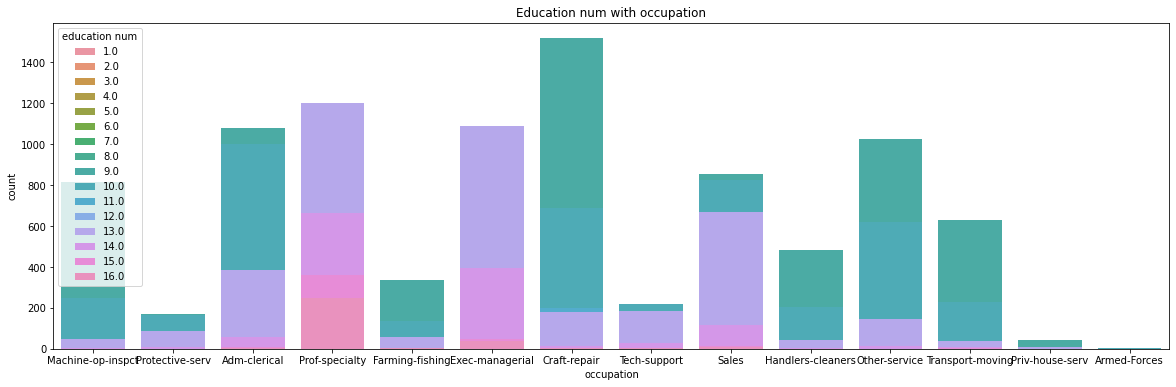

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('Education num with occupation')
sns.countplot(x = train_set['occupation'],
              data = train_set,
              hue = train_set['education num'],
              dodge = False, )

plt.show()

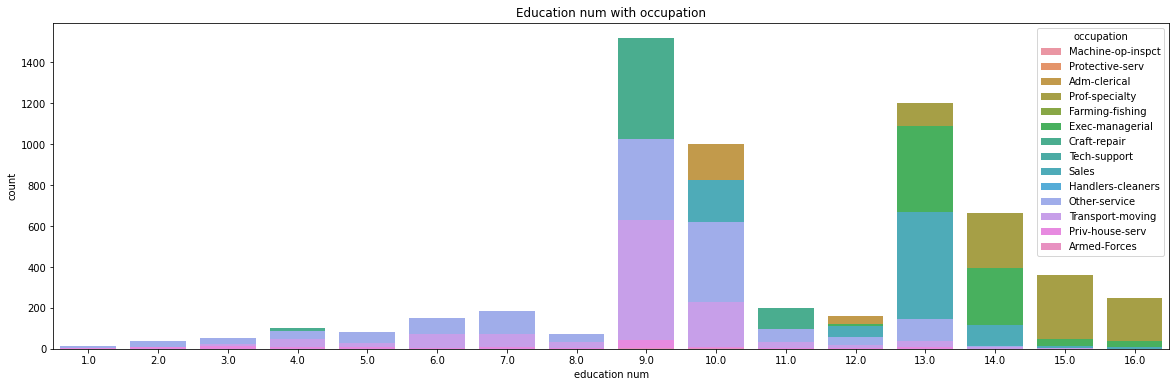

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('Education num with occupation')
sns.countplot(x = train_set['education num'],
              data = train_set,
              hue = train_set['occupation'],
              dodge = False, )

plt.show()

In [ ]:
train_set.groupby('education num').mean()

,age,hours per week
education num,,
1.0,45.395349,37.116279
2.0,46.055944,38.035211
3.0,44.216418,38.322222
4.0,50.535902,38.054291
5.0,42.596200,37.658879
6.0,38.346154,37.056300
7.0,33.007315,33.596455
8.0,31.424069,35.830028
9.0,39.546193,40.392840


In [ ]:
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 1),'age'] = 45.4
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 2),'age'] = 46.1
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 3),'age'] = 44.2
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 4),'age'] = 50.5
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 5),'age'] = 42.6
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 6),'age'] = 38.3
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 7),'age'] = 33.0
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 8),'age'] = 31.4
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 9),'age'] = 39.5
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 10),'age'] = 36.4
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 11),'age'] = 39.4
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 12),'age'] = 37.9
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 13),'age'] = 39.4
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 14),'age'] = 44.3
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 15),'age'] = 45.8
train_set.loc[(train_set.age.isnull())&(train_set['education num']== 16),'age'] = 48.6

train_set.isnull().sum()

age                  2
education num      257
occupation        1866
race               256
sex                208
hours per week     265
country            762
income               0
dtype: int64

In [ ]:
train_set = train_set.dropna(axis='index', how='all', subset=['education num', 'age'])

In [ ]:
train_set.groupby('occupation').mean()

,age,education num,hours per week
occupation,,,
Adm-clerical,37.420519,10.093624,37.392881
Armed-Forces,30.222222,10.111111,40.666667
Craft-repair,39.364216,9.099046,42.155692
Exec-managerial,42.550228,11.424103,44.934356
Farming-fishing,41.741667,8.616995,46.980222
Handlers-cleaners,32.605606,8.488095,37.726027
Machine-op-inspct,38.202185,8.460427,40.726071
Other-service,35.513759,8.739840,34.581970
Priv-house-serv,46.410448,7.287879,33.526718


In [ ]:
train_set = train_set.rename(columns={'education num':'educnum'})

In [ ]:
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Adm-clerical'),'educnum'] = 10.1
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Armed-Forces'),'educnum'] = 10.1
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Craft-repair'),'educnum'] = 9.1
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Exec-managerial'),'educnum'] = 11.4
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Farming-fishing'),'educnum'] = 8.6
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Handlers-cleaners'),'educnum'] = 8.5
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Machine-op-inspct'),'educnum'] = 8.5
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Other-service'),'educnum'] = 8.7
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Priv-house-serv'),'educnum'] = 7.3
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Prof-specialty'),'educnum'] = 12.9
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Protective-serv'),'educnum'] = 10.1
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Sales'),'educnum'] = 10.3
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Tech-support'),'educnum'] = 11.0
train_set.loc[(train_set.educnum.isnull())&(train_set['occupation']== 'Transport-moving'),'educnum'] = 8.7

train_set.isnull().sum()

age                  0
educnum             19
occupation        1866
race               256
sex                208
hours per week     265
country            762
income               0
dtype: int64

In [ ]:
train_set = train_set.dropna(axis='index', how='all', subset=['educnum', 'occupation'])

In [ ]:
train_set = train_set.rename(columns={'educnum':'education num'})

In [ ]:
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 1),'occupation'] = 'Other-service'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 2),'occupation'] = 'Other-service'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 3),'occupation'] = 'Other-service'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 4),'occupation'] = 'Other-service'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 5),'occupation'] = 'Other-service'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 6),'occupation'] = 'Transport-moving'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 7),'occupation'] = 'Other-service'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 8),'occupation'] = 'Transport-moving'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 9),'occupation'] = 'Transport-moving'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 10),'occupation'] = 'Other-service'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 11),'occupation'] = 'Craft-repair'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 12),'occupation'] = 'Sales'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 13),'occupation'] = 'Sales'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 14),'occupation'] = 'Exec-managerial'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 15),'occupation'] = 'Prof-specialty'
train_set.loc[(train_set.occupation.isnull())&(train_set['education num']== 16),'occupation'] = 'Prof-specialty'

In [ ]:
train_set.isnull().sum()

age                 0
education num       0
occupation          0
race              256
sex               208
hours per week    265
country           761
income              0
dtype: int64

In [ ]:
train_set['hours per week'].mean()

40.28016406517033

In [ ]:
train_set = train_set.rename(columns={'hours per week':'hpw'})

In [ ]:
train_set.loc[train_set.race.isnull(), 'race'] = 'White'
train_set.loc[train_set.sex.isnull(),'sex'] = 'Male'
train_set.loc[train_set.hpw.isnull(), 'hpw'] = 40.28
train_set.loc[train_set.country.isnull(), 'country'] = 'United-States'

In [ ]:
train_set = train_set.rename(columns={'hpw':'hours per week'})
train_set.isnull().sum()

age               0
education num     0
occupation        0
race              0
sex               0
hours per week    0
country           0
income            0
dtype: int64

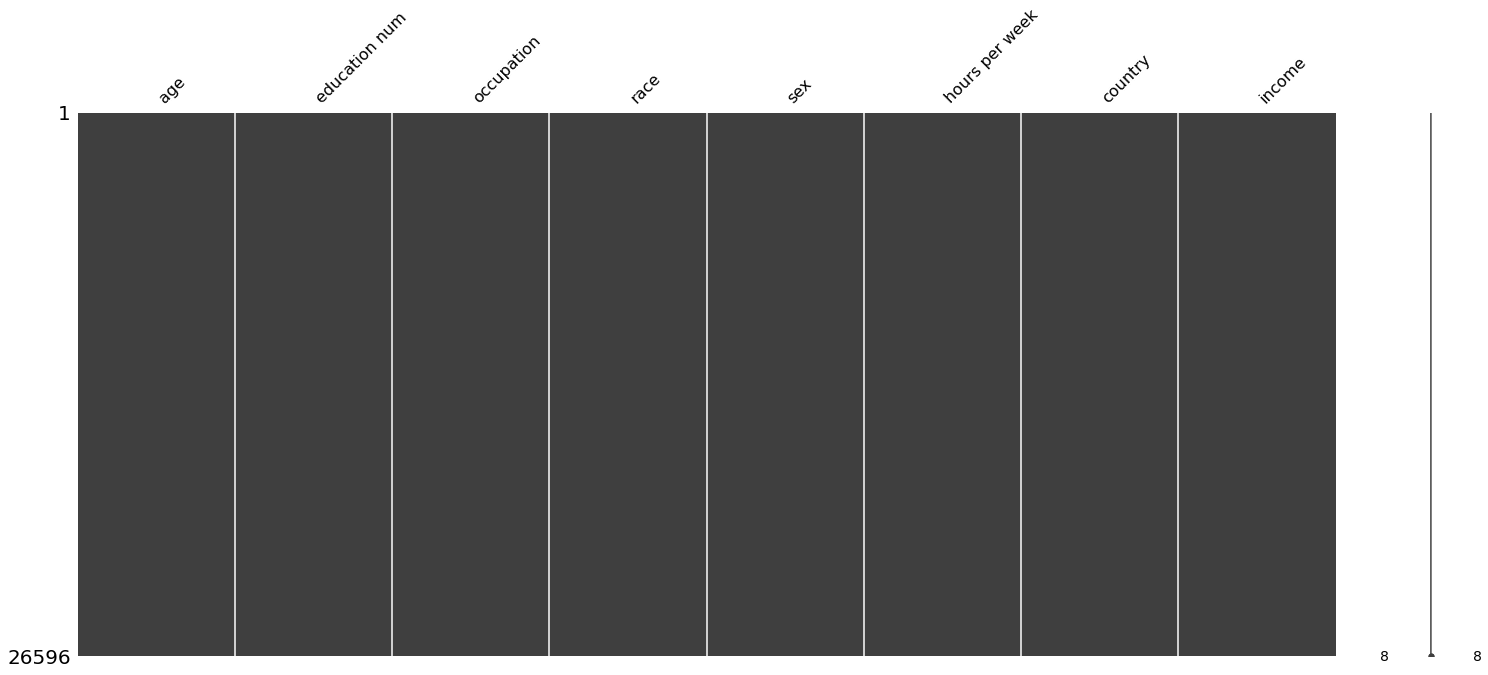

In [ ]:
%matplotlib inline
msno.matrix(train_set.sample(len(train_set)))

In [ ]:
train_set=train_set.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [ ]:
train_set

,age,education num,occupation,race,sex,hours per week,country,income
29604,38.0,9.0,Machine-op-inspct,White,Male,48.0,United-States,1
21430,34.0,9.0,Protective-serv,Amer-Indian-Eskimo,Male,40.0,United-States,0
25961,17.0,7.0,Adm-clerical,White,Male,16.0,United-States,0
768,51.0,16.0,Prof-specialty,White,Male,40.0,United-States,1
22922,49.0,9.0,Farming-fishing,White,Male,55.0,United-States,0
...,...,...,...,...,...,...,...,...
31133,57.0,9.0,Farming-fishing,White,Male,60.0,United-States,0
16978,32.0,13.0,Adm-clerical,White,Female,2.0,United-States,0
4197,18.0,7.0,Handlers-cleaners,White,Male,30.0,United-States,0
28684,22.0,9.0,Machine-op-inspct,White,Male,50.0,United-States,0


In [ ]:
test_set = test_set.drop(['fnlwgt', 'marital', 'relationship', 'capital gain', 'capital loss','education', 'workclass'], axis=1)

In [ ]:
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 1),'age'] = 45.4
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 2),'age'] = 46.1
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 3),'age'] = 44.2
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 4),'age'] = 50.5
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 5),'age'] = 42.6
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 6),'age'] = 38.3
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 7),'age'] = 33.0
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 8),'age'] = 31.4
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 9),'age'] = 39.5
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 10),'age'] = 36.4
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 11),'age'] = 39.4
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 12),'age'] = 37.9
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 13),'age'] = 39.4
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 14),'age'] = 44.3
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 15),'age'] = 45.8
test_set.loc[(test_set.age.isnull())&(test_set['education num']== 16),'age'] = 48.6

In [ ]:
test_set = test_set.dropna(axis='index', how='all', subset=['education num', 'age'])
test_set = test_set.rename(columns={'education num':'educnum'})
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Adm-clerical'),'educnum'] = 10.1
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Armed-Forces'),'educnum'] = 10.1
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Craft-repair'),'educnum'] = 9.1
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Exec-managerial'),'educnum'] = 11.4
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Farming-fishing'),'educnum'] = 8.6
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Handlers-cleaners'),'educnum'] = 8.5
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Machine-op-inspct'),'educnum'] = 8.5
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Other-service'),'educnum'] = 8.7
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Priv-house-serv'),'educnum'] = 7.3
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Prof-specialty'),'educnum'] = 12.9
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Protective-serv'),'educnum'] = 10.1
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Sales'),'educnum'] = 10.3
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Tech-support'),'educnum'] = 11.0
test_set.loc[(test_set.educnum.isnull())&(test_set['occupation']== 'Transport-moving'),'educnum'] = 8.7
test_set = test_set.dropna(axis='index', how='all', subset=['educnum', 'occupation'])
test_set = test_set.rename(columns={'educnum':'education num'})
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 1),'occupation'] = 'Other-service'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 2),'occupation'] = 'Other-service'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 3),'occupation'] = 'Other-service'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 4),'occupation'] = 'Other-service'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 5),'occupation'] = 'Other-service'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 6),'occupation'] = 'Transport-moving'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 7),'occupation'] = 'Other-service'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 8),'occupation'] = 'Transport-moving'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 9),'occupation'] = 'Transport-moving'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 10),'occupation'] = 'Other-service'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 11),'occupation'] = 'Craft-repair'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 12),'occupation'] = 'Sales'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 13),'occupation'] = 'Sales'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 14),'occupation'] = 'Exec-managerial'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 15),'occupation'] = 'Prof-specialty'
test_set.loc[(test_set.occupation.isnull())&(test_set['education num']== 16),'occupation'] = 'Prof-specialty'
test_set = test_set.rename(columns={'hours per week':'hpw'})
test_set.loc[test_set.race.isnull(), 'race'] = 'White'
test_set.loc[test_set.sex.isnull(), 'sex'] = 'Male'
test_set.loc[test_set.hpw.isnull(), 'hpw'] = 40.28
test_set.loc[test_set.country.isnull(), 'country'] = 'United-States'
test_set = test_set.rename(columns={'hpw':'hours per week'})

In [ ]:
test_set.isnull().sum()

age               0
education num     0
occupation        0
race              0
sex               0
hours per week    0
country           0
income            0
dtype: int64

In [ ]:
test_set=test_set.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [ ]:
cat_feat = ['occupation', 'country', 'race']
num_feat = ['age', 'education num', 'hours per week']

In [ ]:
train_set.loc[df['sex'] == 'Male', 'sex'] = 0
train_set.loc[df['sex'] == 'Female', 'sex'] = 1

In [ ]:
test_set.loc[df['sex'] == 'Male', 'sex'] = 0
test_set.loc[df['sex'] == 'Female', 'sex'] = 1

In [ ]:
X_train= train_set.drop(columns=['income'], axis=1, inplace=False)
y_train= train_set['income']

In [ ]:
X_test= test_set.drop(columns=['income'], axis=1, inplace=False)
y_test= test_set['income']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
y_train

29604    1
21430    0
25961    0
768      1
22922    0
        ..
31133    0
16978    0
4197     0
28684    0
14985    0
Name: income, Length: 19317, dtype: object

In [ ]:
X_test

,age,education num,occupation,race,sex,hours per week,country
21459,55.0,13.0,Machine-op-inspct,White,0,40.00,United-States
24440,47.0,4.0,Sales,White,0,40.00,Puerto-Rico
27707,34.0,11.0,Protective-serv,Asian-Pac-Islander,0,40.28,United-States
31230,57.0,3.0,Other-service,White,0,40.00,Italy
2515,48.0,9.0,Craft-repair,White,0,70.00,United-States
...,...,...,...,...,...,...,...
3586,51.0,15.0,Prof-specialty,White,0,40.00,United-States
32305,90.0,9.0,Adm-clerical,White,1,25.00,United-States
2981,38.0,10.0,Adm-clerical,White,1,44.00,United-States
10201,47.0,4.0,Handlers-cleaners,Black,0,40.00,United-States


In [ ]:
y_test

21459    0
24440    0
27707    0
31230    0
2515     1
        ..
3586     0
32305    0
2981     0
10201    0
17773    0
Name: income, Length: 5872, dtype: object

In [ ]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train[cat_feat].values)
X_train_cat = ohe.transform(X_train[cat_feat].values)
X_test_cat = ohe.transform(X_test[cat_feat].values)

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train[num_feat].values)
X_train_num = scalar.transform(X_train[num_feat].values)
X_test_num = scalar.transform(X_test[num_feat].values)

In [ ]:
X_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_test = np.concatenate([X_test_num, X_test_cat], axis=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#y_pred = classifier.predict(X_test)

In [ ]:
error = []

for i in range(120, 141):
    knn = KNeighborsClassifier(n_neighbors=i)
    y_train=y_train.astype('int')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

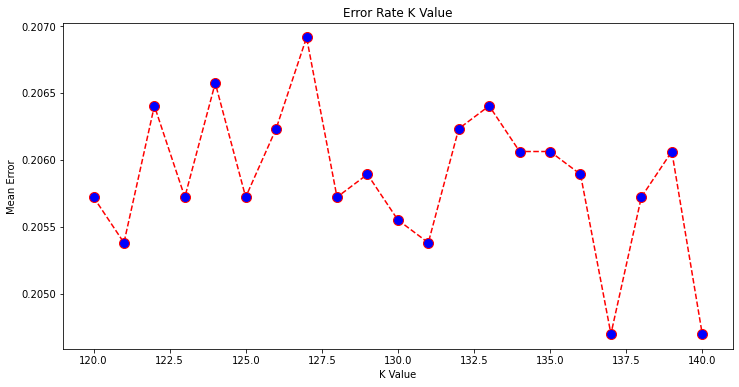

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(120, 141), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
ooo=[]
kfold = KFold(n_splits=10)
kfold_cvresult = cross_val_score(KNeighborsClassifier(n_neighbors=137),X_train,y_train,cv=kfold,scoring="accuracy")
ooo.append(kfold_cvresult)

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used tos sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}  



In [ ]:
from sklearn.ensemble import RandomForestClassifier
kfold = KFold(n_splits=10)
kfold_cvresult = cross_val_score(RandomForestClassifier(n_estimators = 100, min_samples_leaf=3, max_features='sqrt', max_depth=20, bootstrap=True),X_train,y_train,cv=kfold,scoring="accuracy")
ooo.append(kfold_cvresult)

In [ ]:
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10)
kfold_cvresult = cross_val_score(LogisticRegression(),X_train,y_train,cv=kfold,scoring="accuracy")
ooo.append(kfold_cvresult)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
dec_tree = tree.DecisionTreeClassifier()
pca = decomposition.PCA()
std_slc = StandardScaler()

In [ ]:
pipe = Pipeline(steps=[('pca', pca),
                           ('dec_tree', dec_tree)])

In [ ]:
n_components = list(range(3,11))

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [ ]:
parameters = dict(dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 4
Best Number Of Components: None

DecisionTreeClassifier(max_depth=4)


In [ ]:
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10)
kfold_cvresult = cross_val_score(DecisionTreeClassifier(max_depth=4),X_train,y_train,cv=kfold,scoring="accuracy")
ooo.append(kfold_cvresult)

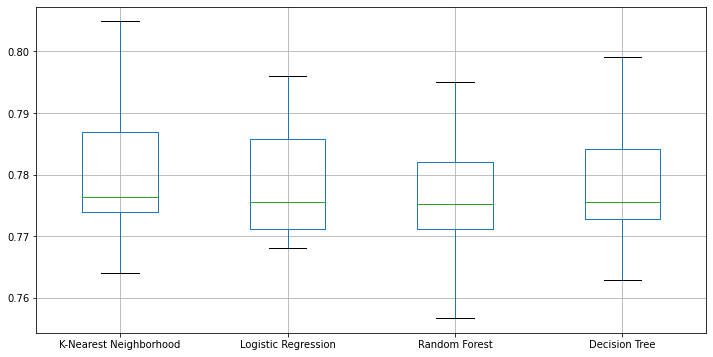

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(ooo,index=['K-Nearest Neighborhood', 'Logistic Regression','Random Forest','Decision Tree',])
box.T.boxplot()

In [ ]:
ooo

[array([0.80486542, 0.78416149, 0.78778468, 0.77380952, 0.79037267,
        0.77639752, 0.76397516, 0.77058519, 0.77421025, 0.77628172]),
 array([0.79606625, 0.78881988, 0.79192547, 0.76966874, 0.77536232,
        0.77432712, 0.76811594, 0.77006732, 0.77679959, 0.77576385]),
 array([0.79503106, 0.7826087 , 0.79244306, 0.77380952, 0.7805383 ,
        0.77277433, 0.75672878, 0.76747799, 0.77679959, 0.77058519]),
 array([0.79917184, 0.77795031, 0.78726708, 0.76293996, 0.78623188,
        0.77329193, 0.77743271, 0.76747799, 0.77369239, 0.77265665])]

In [ ]:
mylist=[0.79606625, 0.78881988, 0.79192547, 0.76966874, 0.77536232,
        0.77432712, 0.76811594, 0.77006732, 0.77679959, 0.77576385]
np.mean(mylist)

0.7786916479999999

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Y_test=np.array(y_test)

In [ ]:
Y_train = np.array(y_train)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve

In [ ]:
y_test

21459    0
24440    0
27707    0
31230    0
2515     1
        ..
3586     0
32305    0
2981     0
10201    0
17773    0
Name: income, Length: 5872, dtype: object

In [ ]:
Y_test = Y_test.astype(int)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 137)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_proba_test = knn.predict_proba(X_test)[:, 1]

acc = accuracy_score(Y_test, y_pred_test)
prc = precision_score(Y_test, y_pred_test)
rec = recall_score(Y_test, y_pred_test)
fs = f1_score(Y_test, y_pred_test)
aucs = roc_auc_score(Y_test, y_proba_test)

knn_eva = [acc,prc,rec,fs,aucs]

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

Accuracy: 0.7953, Precision: 0.6616, Recall: 0.3605, F1: 0.4667, AUC: 0.8194


In [ ]:
fpr_knn, tpr_knn, threshold = roc_curve(Y_test, y_proba_test)
rocauc_knn = auc(fpr_knn, tpr_knn)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_test =log_reg.predict(X_test)
y_proba_test = log_reg.predict_proba(X_test)[:, 1]

acc = accuracy_score(Y_test, y_pred_test)
prc = precision_score(Y_test, y_pred_test)
rec = recall_score(Y_test, y_pred_test)
fs = f1_score(Y_test, y_pred_test)
aucs = roc_auc_score(Y_test, y_proba_test)

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

Accuracy: 0.7888, Precision: 0.6420, Recall: 0.3393, F1: 0.4439, AUC: 0.8075


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
fpr_lr, tpr_lr, threshold = roc_curve(Y_test, y_proba_test)
rocauc_lr = auc(fpr_lr, tpr_lr)

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf=3, max_features='sqrt', max_depth=20, bootstrap=True)
rf.fit(X_train, y_train)

y_pred_test = rf.predict(X_test)
y_proba_test = rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(Y_test, y_pred_test)
prc = precision_score(Y_test, y_pred_test)
rec = recall_score(Y_test, y_pred_test)
fs = f1_score(Y_test, y_pred_test)
aucs = roc_auc_score(Y_test, y_proba_test)

rf_eva = [acc,prc,rec,fs,aucs]

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

Accuracy: 0.7975, Precision: 0.7136, Recall: 0.3091, F1: 0.4314, AUC: 0.8294


In [ ]:
fpr_rf, tpr_rf, threshold = roc_curve(Y_test, y_proba_test)
rocauc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)

y_pred_test = dt.predict(X_test)
y_proba_test = dt.predict_proba(X_test)[:, 1]

acc = accuracy_score(Y_test, y_pred_test)
prc = precision_score(Y_test, y_pred_test)
rec = recall_score(Y_test, y_pred_test)
fs = f1_score(Y_test, y_pred_test)
aucs = roc_auc_score(Y_test, y_proba_test)

dt_eva = [acc,prc,rec,fs,aucs]

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

Accuracy: 0.7885, Precision: 0.6714, Recall: 0.2913, F1: 0.4063, AUC: 0.7892


In [ ]:
fpr_dt, tpr_dt, threshold = roc_curve(Y_test, y_proba_test)
rocauc_dt = auc(fpr_dt, tpr_dt)

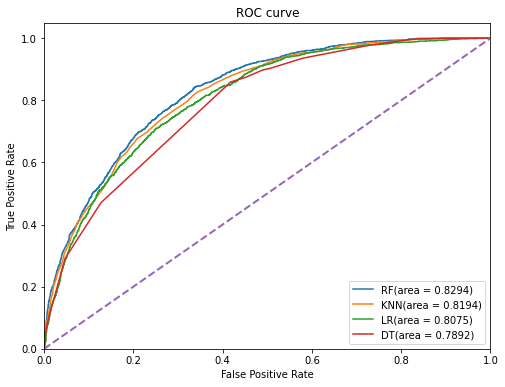

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(fpr_rf, tpr_rf, label=f'RF(area = {rocauc_rf:.4f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN(area = {rocauc_knn:.4f})')
plt.plot(fpr_lr, tpr_lr, label=f'LR(area = {rocauc_lr:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'DT(area = {rocauc_dt:.4f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()